# 430 Group project 2
## UCLA Instructor: Dr. Rojas 
## Date: Nov 22, 2023 
## Group member

- <font size="4"> Pinhsuan Chiu
- <font size="4"> Ganyu Chen
- <font size="4"> Hanyu Liu
- <font size="4"> Jialong Feng

In [2]:
#Import all tools 
import statistics
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wooldridge as woo
from scipy.stats import norm
import random
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from pandas import DataFrame as df 
from scipy import io as spio
from scipy import stats
from scipy import misc
from fitter import Fitter
from boruta import BorutaPy
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# 1. Variable Selection

  0%|          | 0/50 [00:00<?, ?it/s]

6 attributes confirmed important: ['draft', 'avgmin', 'points', 'rebounds', 'age', 'exper']
3 attributes confirmed unimportant: ['games', 'assists', 'coll']
1 tentative attributes remains: ['minutes']


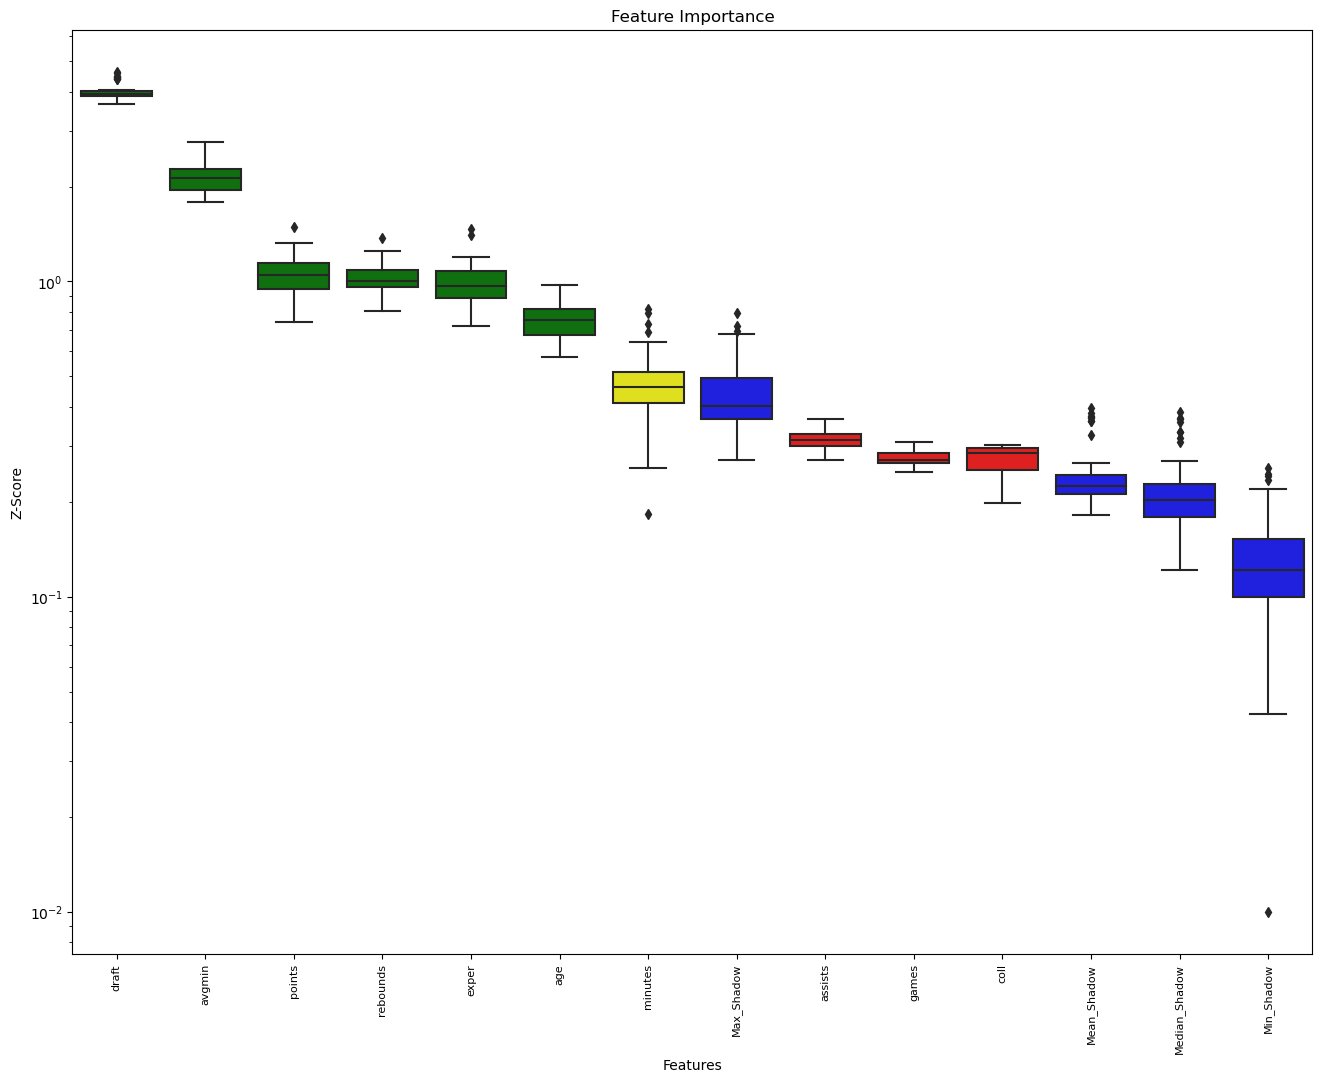

In [4]:
#a) Bruta Algorithm
#drop the missing value.
nba_salary = woo.data('nbasal').dropna()
#confirm the dependent and independent vars:
#   y:'wage'
#   x:'exper', 'age', 'coll', 'games', 'minutes', 'assists', 'draft', 'points', 'rebounds','avgmin'
y = nba_salary['wage']
x = nba_salary[['exper', 'age', 'coll', 'games', 'minutes', 'assists', 'draft', 'points', 'rebounds','avgmin']]
def BorutaAlgo(X_train,y_train):
    Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
    Feature_Selector.fit(X=X_train, y=y_train, n_trials=50, random_state=0,)
    Feature_Selector.plot(which_features='all', figsize=(16,12))
    

BorutaAlgo(x,y)

marr reg: 
 
                             OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.360
Date:                Sun, 19 Nov 2023   Prob (F-statistic):             0.0123
Time:                        23:06:28   Log-Likelihood:                -1993.9
No. Observations:                 240   AIC:                             3992.
Df Residuals:                     238   BIC:                             3999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1388.7459     85.460     1

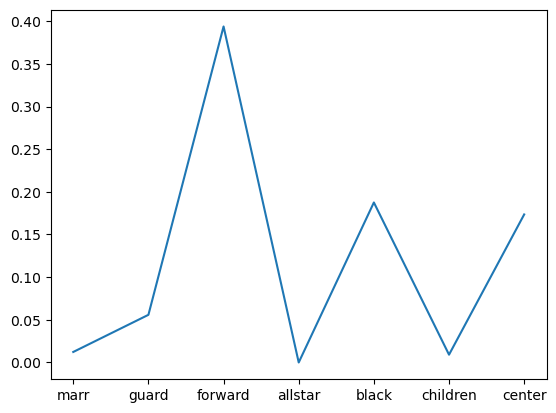

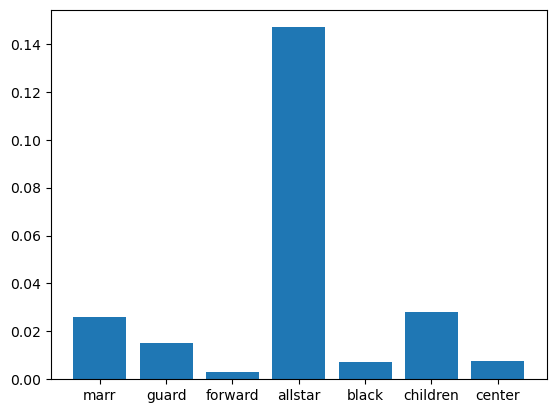

In [5]:
#b) Choosing Categorial Variable 
from statsmodels.tools.tools import categorical
import statsmodels.formula.api as smf
#import statsmodel.api as sm
#selected variables
selected_continuous_variables = ['exper', 'draft', 'points', 'rebounds', 'avgmin']
categorical_vars = "marr guard forward allstar black children center".split()
nba_salary[categorical_vars]

#create a dataframe for pvalues and rsquared
pvalues_and_rsquared_df = pd.DataFrame(columns = ['xvar','pvalues','rsquared'])

def regress_y_categorical_vars(data,y_vars,categorical_vars):
  for xvars in categorical_vars:
    #x2 = sm.add_constant(data[xvars])
    reg_pattern = y_vars+"~"+xvars
    univariate_model = smf.ols(reg_pattern,nba_salary).fit()
    pvalues_and_rsquared_df.loc[len(pvalues_and_rsquared_df)] = [xvars,univariate_model.pvalues[xvars],univariate_model.rsquared]
    print(xvars,"reg:","\n","\n",univariate_model.summary(),"\n","-------------------------","\n")
  print("table of p_values and r_squared","\n",pvalues_and_rsquared_df.sort_values(by='pvalues'))

regress_y_categorical_vars(nba_salary,'wage',categorical_vars)

#plot the result of pvalues and rsquared
from matplotlib import pyplot as plt
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(pvalues_and_rsquared_df['xvar'],pvalues_and_rsquared_df['pvalues'])
ax2 = f2.add_subplot(111)
ax2.bar(pvalues_and_rsquared_df['xvar'],pvalues_and_rsquared_df['rsquared'])
plt.show()

'draft', 'avgmin', 'exper', 'points', 'rebounds', 'age'
'allstar','marr','children'

# 2. Desciptive Analysis


In [7]:
#Load the data
nba_salary = woo.data('nbasal')[['wage','draft', 'avgmin', 'exper', 'points', 'rebounds', 'age' ,'allstar','marr','children']]

# Look at the data 
nba_salary.head()

# Statistical summary of the data
print(nba_salary.describe())



              wage      draft      avgmin       exper      points    rebounds  \
count   269.000000  240.00000  269.000000  269.000000  269.000000  269.000000   
mean   1423.827511   20.20000   23.979254    5.118959   10.210409    4.401115   
std     999.774073   18.73582    9.731177    3.400062    5.900667    2.892573   
min     150.000000    1.00000    2.888889    1.000000    1.200000    0.500000   
25%     650.000000    7.00000   16.731340    2.000000    5.400000    2.300000   
50%    1186.000000   14.50000   24.816900    4.000000    9.300000    3.800000   
75%    2014.500000   28.25000   33.256100    7.000000   14.200000    5.500000   
max    5740.000000  139.00000   43.085369   18.000000   29.799999   17.299999   

              age     allstar        marr    children  
count  269.000000  269.000000  269.000000  269.000000  
mean    27.394052    0.115242    0.442379    0.345725  
std      3.391292    0.319909    0.497595    0.476491  
min     21.000000    0.000000    0.000000    0

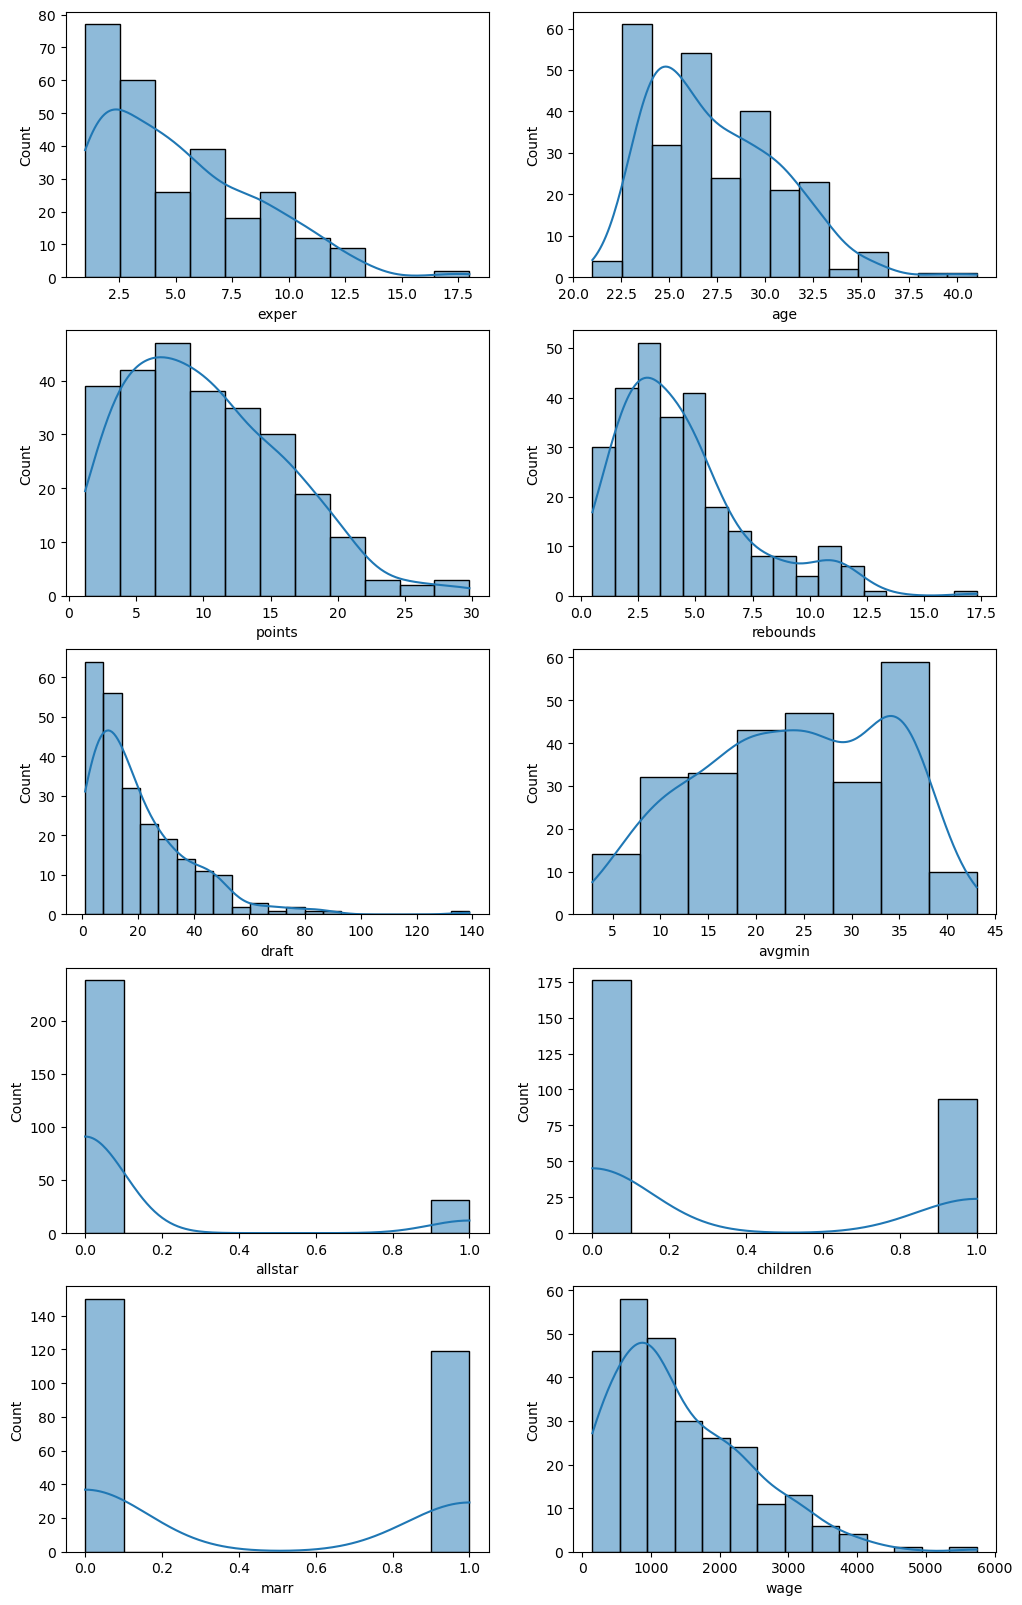

In [8]:
#a ) Histogram and density plots
fig = plt.figure(figsize=(12,20))
ax1= fig.add_subplot(5,2,1)
sns.histplot(nba_salary.exper,bins='fd',kde=True)

ax2= fig.add_subplot(5,2,2)
sns.histplot(nba_salary.age,bins='fd',kde=True)

ax3= fig.add_subplot(5,2,3)
sns.histplot(nba_salary.points,bins='fd',kde=True)

ax4= fig.add_subplot(5,2,4)
sns.histplot(nba_salary.rebounds,bins='fd',kde=True)

ax5= fig.add_subplot(5,2,5)
sns.histplot(nba_salary.draft,bins='fd',kde=True)

ax6= fig.add_subplot(5,2,6)
sns.histplot(nba_salary.avgmin,bins='fd',kde=True)

ax7= fig.add_subplot(5,2,7)
sns.histplot(nba_salary.allstar, kde=True)

ax8= fig.add_subplot(5,2,8)
sns.histplot(nba_salary.children,kde=True)

ax9= fig.add_subplot(5,2,9)
sns.histplot(nba_salary.marr,kde=True)

ax10= fig.add_subplot(5,2,10)
sns.histplot(nba_salary.wage,bins='fd',kde=True)

plt.show()


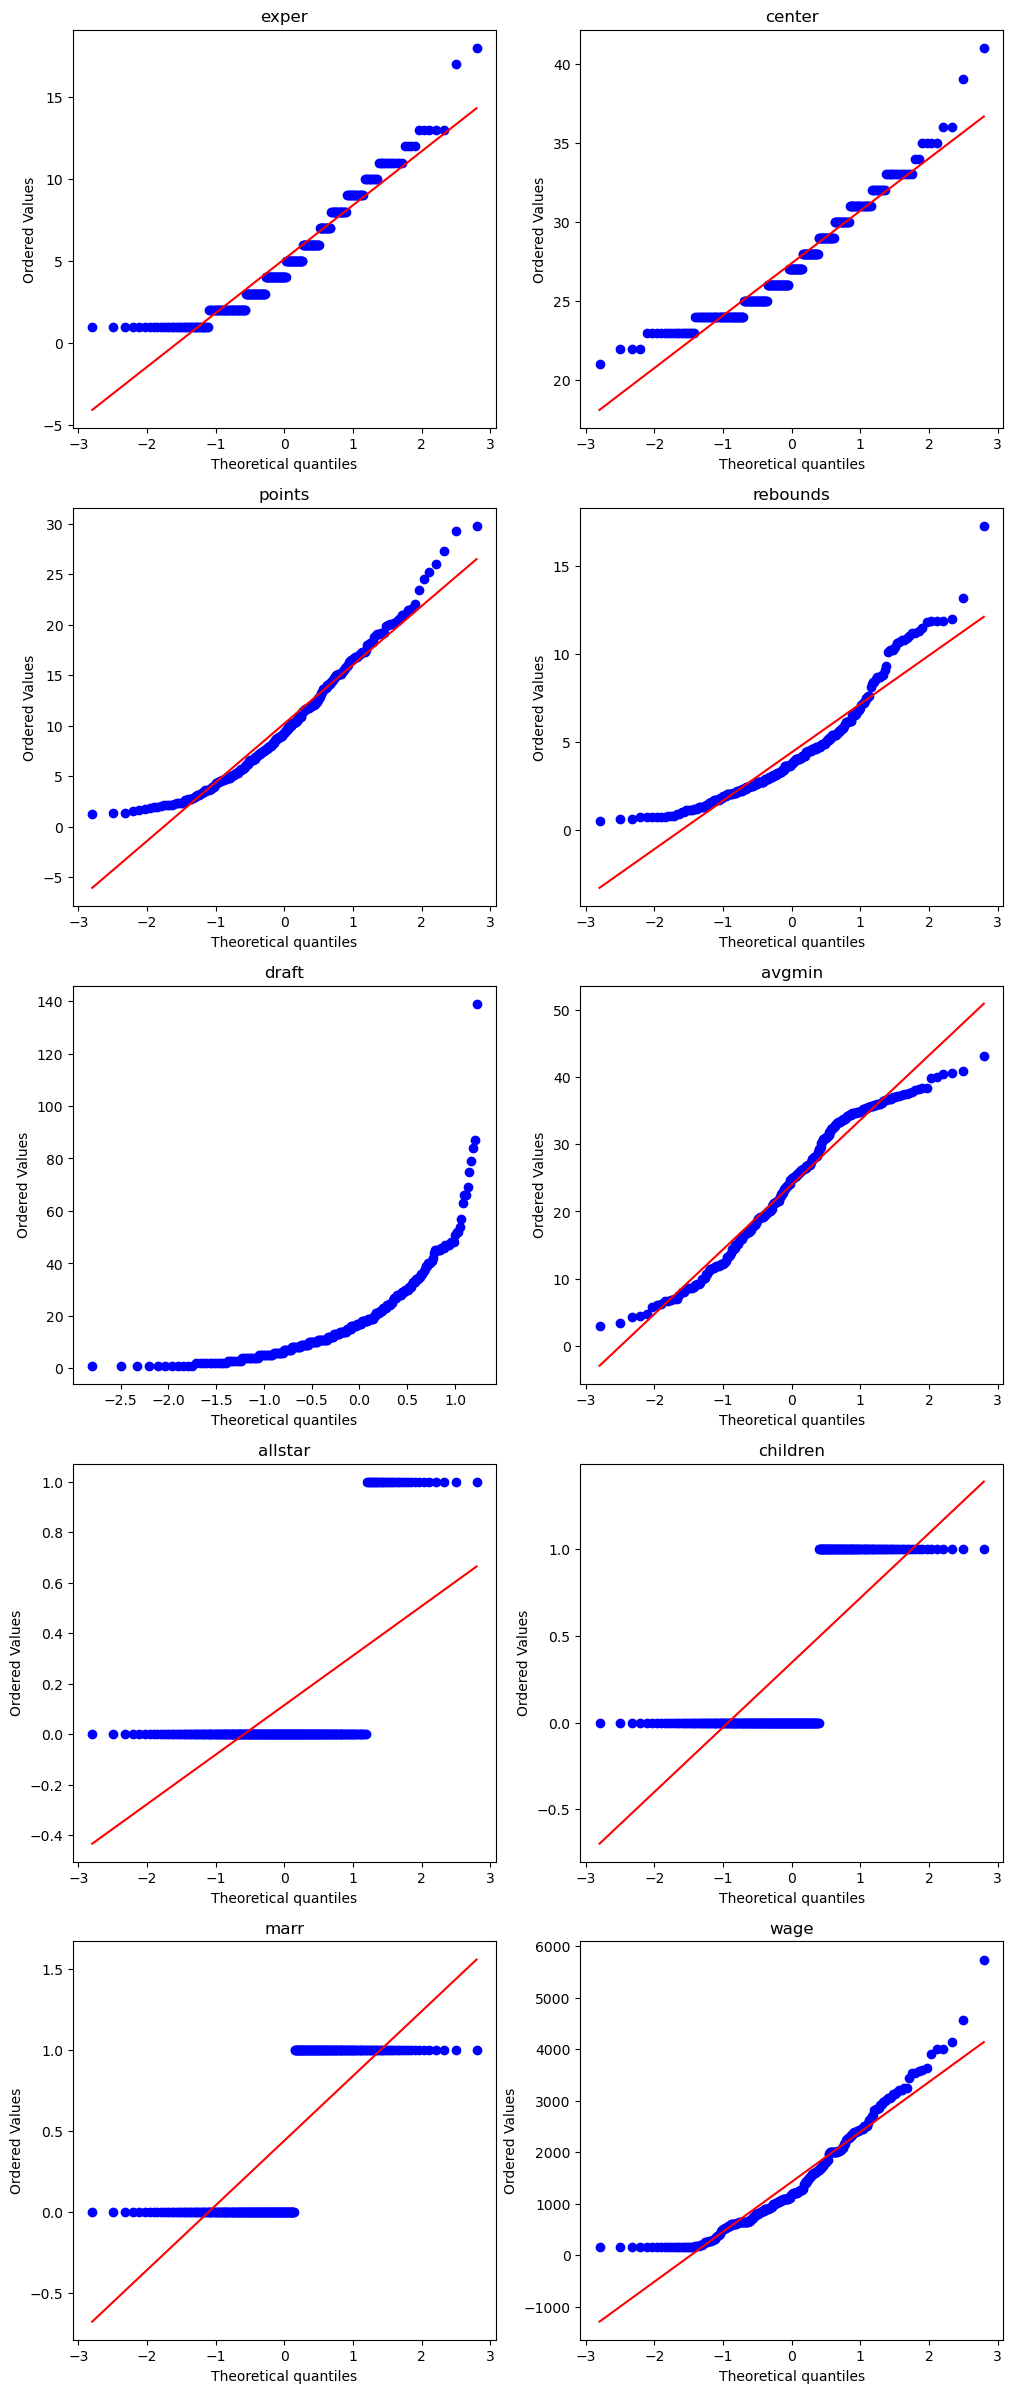

In [9]:
#q-q plot of each variables
fig = plt.figure(figsize=(12,30))
ax1 = fig.add_subplot(5,2,1)
stats.probplot(nba_salary.exper, dist = 'norm', plot = plt, fit=True)
ax1.set_title('exper')

ax2 = fig.add_subplot(5,2,2)
stats.probplot(nba_salary.age, dist = 'norm', plot = plt, fit=True)
ax2.set_title('center')

ax3 = fig.add_subplot(5,2,3)
stats.probplot(nba_salary.points, dist = 'norm', plot = plt, fit=True)
ax3.set_title('points')

ax4 = fig.add_subplot(5,2,4)
stats.probplot(nba_salary.rebounds, dist = 'norm', plot = plt, fit=True)
ax4.set_title('rebounds')

ax5 = fig.add_subplot(5,2,5)
stats.probplot(nba_salary.draft, dist = 'norm', plot = plt, fit=True)
ax5.set_title('draft')

ax6 = fig.add_subplot(5,2,6)
stats.probplot(nba_salary.avgmin, dist = 'norm', plot = plt, fit=True)
ax6.set_title('avgmin')

ax7 = fig.add_subplot(5,2,7)
stats.probplot(nba_salary.allstar, dist = 'norm', plot = plt, fit=True)
ax7.set_title('allstar')

ax8 = fig.add_subplot(5,2,8)
stats.probplot(nba_salary.children, dist = 'norm', plot = plt, fit=True)
ax8.set_title('children')

ax9 = fig.add_subplot(5,2,9)
stats.probplot(nba_salary.marr, dist = 'norm', plot = plt, fit=True)
ax9.set_title('marr')

ax10 = fig.add_subplot(5,2,10)
stats.probplot(nba_salary.wage, dist = 'norm', plot = plt, fit=True)
ax10.set_title('wage')
plt.show()

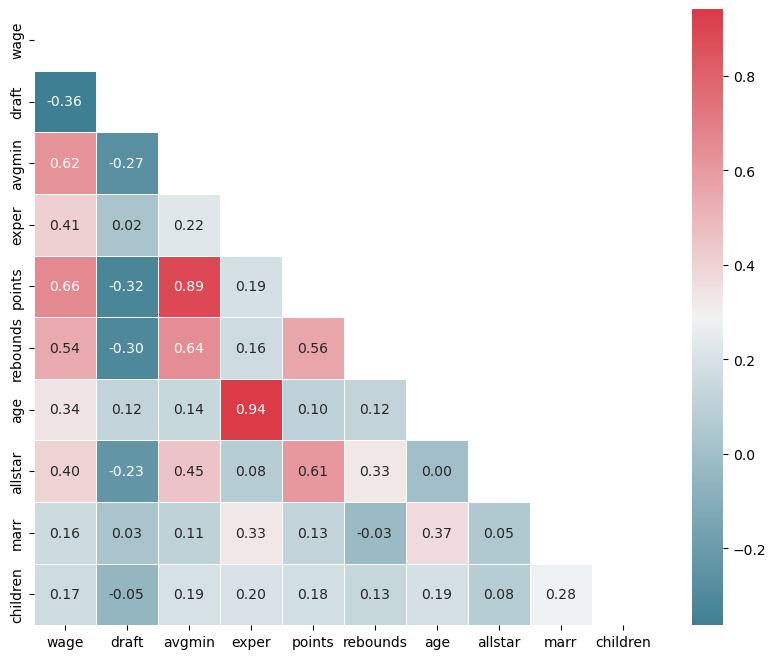

In [10]:
#Correlation Plot:
sub_df = nba_salary[['wage','draft', 'avgmin', 'exper', 'points', 'rebounds', 'age' ,'allstar','marr','children']]
corr = sub_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

a) In the initial phase of the descriptive analysis, a comprehensive exploration of the dataset was conducted. With 269 observations and 29 missing values in the "draft" variable identified from the dataset summary, attention was directed towards understanding the distribution characteristics and potential outliers across various variables.

Statistical measures, such as the range, mean, and median, were examined to assess the presence of skewed distributions and detect unusual observations. Notably, observations revealed disparities between the mean and median values for "wage" and "draft," signaling potential non-normality and the existence of outliers. Consequently, considerations for data transformation were suggested for these variables.

Additionally, scrutiny was extended to three categorical variables: "marr," "children," and "allstar." An evaluation of their mean values illuminated potential sample biases, particularly with "allstar" exhibiting a notable skewness with a value of 0.11 and "children" at 0.34. These findings underscored the necessity for cautious consideration of potential sample imbalances during subsequent modeling endeavors.

Histograms and quantile-quantile (QQ) plots were employed to assess the normality assumptions of these categorical variables. The graphical representations indicated deviations from strict normal distributions, as observed through the deviation of data points from the idealized red line in the QQ plots.

Lastly, correlation plots were generated to explore the relationships among variables. The analysis revealed a significant correlation between the response variable, "wage," and most independent variables, with the exception of "marr and children," which exhibited a modest correlation of 0.16 and 0.17. However, concerns arose over notable correlations between certain independent variables, such as "points" and "avgmin," as well as "age" and "exper," suggesting the presence of multicollinearity. Strategies to address multicollinearity will be pursued in subsequent stages of model development.

This multifaceted exploration establishes a foundation for informed decision-making in subsequent analytical steps, aiming to address outliers, assess variable transformations, and account for potential biases and inter-variable correlations.

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
nakagami,0.000004,1867.632536,1878.416670,inf,0.149246,1.075015e-05
chi,0.000004,1939.770924,1950.555058,inf,0.169591,3.115079e-07
exponpow,0.000004,1874.593508,1885.377642,inf,0.169366,3.247671e-07
beta,0.000004,1871.110765,1885.489611,inf,0.136208,8.168518e-05
gompertz,0.000004,1923.214982,1933.999116,inf,0.078067,7.139237e-02


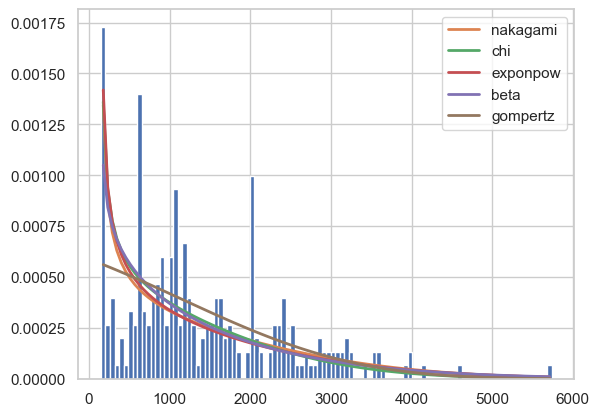

In [45]:
#b) Density Plots and Respective Fitted Distributions
#Cullen-Frey graph: there is no such graph in Python, but there is an alternative to fit the model
# Fit various distributions:
wage = Fitter(nba_salary.wage)
wage.fit()
wage.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
mielke,2.538838,759.876733,774.255579,inf,0.201159,5.110711e-10
burr,2.541332,751.701178,766.080023,inf,0.209844,7.183871e-11
ncx2,2.573726,677.295294,691.674140,inf,0.133829,1.158858e-04
geninvgauss,2.580217,698.266356,712.645201,inf,0.189417,6.329688e-09
exponpow,2.588209,691.232074,702.016208,inf,0.164792,7.487285e-07


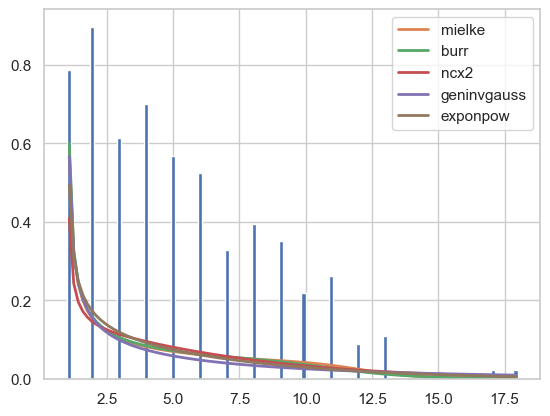

In [84]:
# Fit various distributions:exper
exper = Fitter(nba_salary.exper)
exper.fit()
exper.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace_asymmetric,1.912840,738.898160,749.682294,inf,0.117641,0.001062
skewnorm,1.930813,762.060707,772.844841,inf,0.092267,0.019187
skewcauchy,1.936274,748.639152,759.423286,inf,0.140542,0.000043
genhyperbolic,1.937143,752.004376,769.977933,inf,0.097279,0.011452
johnsonsb,1.941493,760.708786,775.087631,inf,0.093296,0.017297


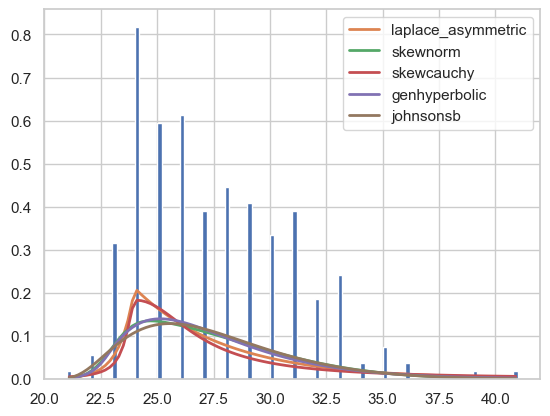

In [85]:
# Fit various distributions:age
center = Fitter(nba_salary.age)
center.fit()
center.summary()


SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponweib,0.037789,775.356271,789.735116,inf,0.022409,0.998868
gengamma,0.037801,775.556621,789.935466,inf,0.022465,0.998822
truncnorm,0.038171,779.899923,794.278768,inf,0.022846,0.998468
gausshyper,0.038215,774.403054,795.971322,inf,0.032207,0.934406
nakagami,0.038538,768.339563,779.123697,inf,0.029683,0.966128


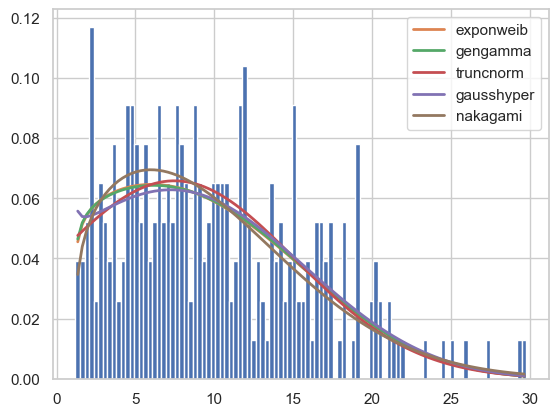

In [86]:
# Fit various distributions:points
points = Fitter(nba_salary.points)
points.fit()
points.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.144734,757.006014,771.384860,inf,0.032360,0.932068
mielke,0.144734,757.005904,771.384750,inf,0.032361,0.932051
genexpon,0.147342,757.904407,775.877964,inf,0.033815,0.907684
ncf,0.148313,758.666163,776.639720,inf,0.032844,0.924400
moyal,0.149594,764.680692,771.870115,inf,0.037792,0.822795


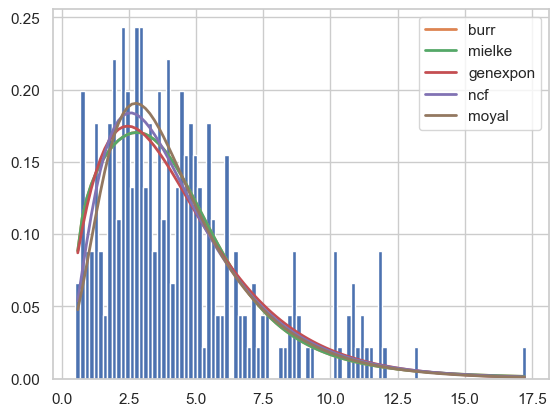

In [92]:
# Fit various distributions:rebounds
rebounds = Fitter(nba_salary.rebounds)
rebounds.fit()
rebounds.summary()

SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED erlang

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
alpha,inf,inf,inf,inf,NaN,NaN
powerlognorm,inf,inf,inf,inf,NaN,NaN
powerlaw,inf,inf,inf,inf,NaN,NaN
pearson3,inf,inf,inf,inf,NaN,NaN
pareto,inf,inf,inf,inf,NaN,NaN


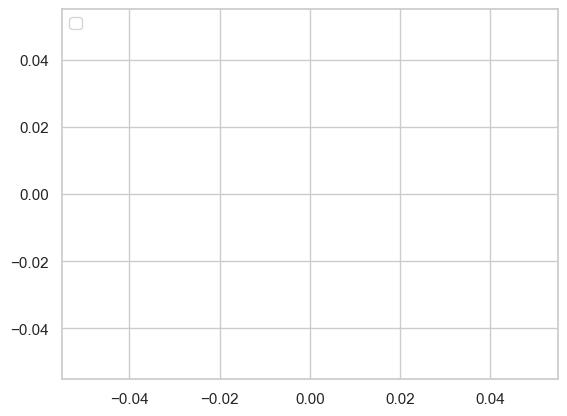

In [91]:
# Fit various distributions:draft
draft = Fitter(nba_salary.draft)
draft.fit()
draft.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
mielke,0.026290,781.277517,795.656363,inf,0.046414,0.591690
burr,0.026316,780.648189,795.027034,inf,0.048305,0.540584
johnsonsb,0.028263,771.614999,785.993844,inf,0.055155,0.372859
gausshyper,0.028321,771.505742,793.074010,inf,0.053386,0.412927
gennorm,0.028641,773.843019,784.627153,inf,0.074646,0.094819


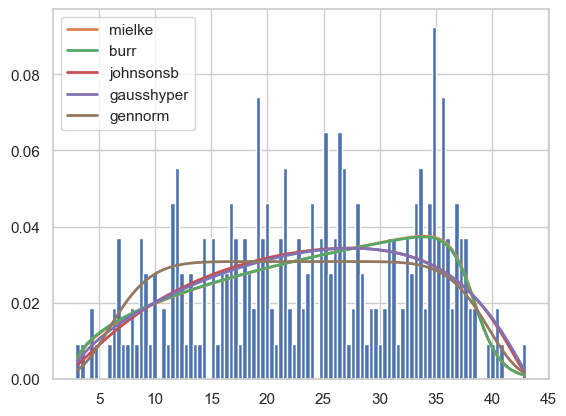

In [93]:
# Fit various distributions:avgmin
avgmin = Fitter(nba_salary.avgmin)
avgmin.fit()
avgmin.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfgennorm,1824.026340,1924.811758,1935.595892,inf,0.884758,1.015515e-252
gengamma,2407.063061,1178.902461,1193.281306,inf,0.884758,1.015515e-252
gennorm,4295.032100,1933.447258,1944.231392,inf,0.500000,1.036133e-62
truncweibull_min,4475.889600,193.104316,211.077872,inf,0.884758,1.015528e-252
pearson3,5054.201011,1280.496226,1291.280360,inf,0.884758,1.015515e-252


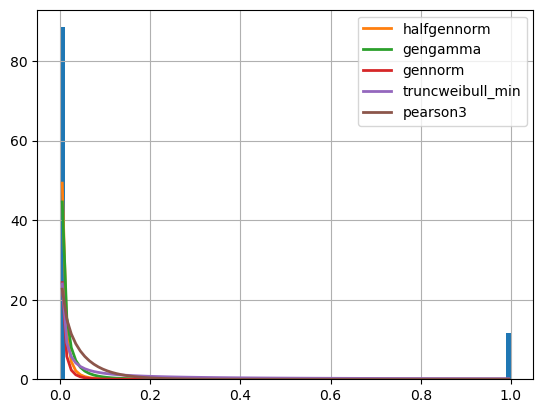

In [11]:
# Fit various distributions:black
expersq = Fitter(nba_salary.allstar)
expersq.fit()
expersq.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfgennorm,2694.059346,506.784732,517.568866,inf,0.557621,2.810904e-79
burr12,3233.104017,356.514807,370.893653,inf,0.557621,2.810904e-79
erlang,3509.582477,410.119147,420.903281,inf,0.550050,5.869279e-77
betaprime,3570.479528,274.387486,288.766331,inf,0.557621,2.810904e-79
chi,3877.550211,167.876351,178.660485,inf,0.557621,2.810971e-79


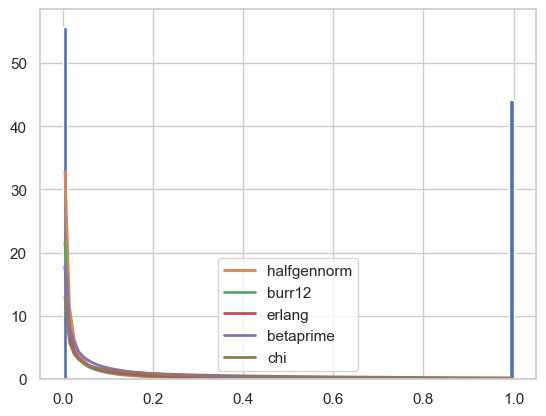

In [95]:
# Fit various distributions:marr
expersq = Fitter(nba_salary.marr)
expersq.fit()
expersq.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfgennorm,2939.271242,345.536355,356.320490,inf,0.654272,2.994659e-113
loglaplace,2957.034259,457.924877,468.709011,inf,0.654275,2.987817e-113
burr12,3128.387708,346.064052,360.442897,inf,0.654275,2.987113e-113
mielke,3716.551241,329.677913,344.056758,inf,0.654275,2.987190e-113
erlang,3774.824379,696.654850,707.438984,inf,0.653066,9.030118e-113


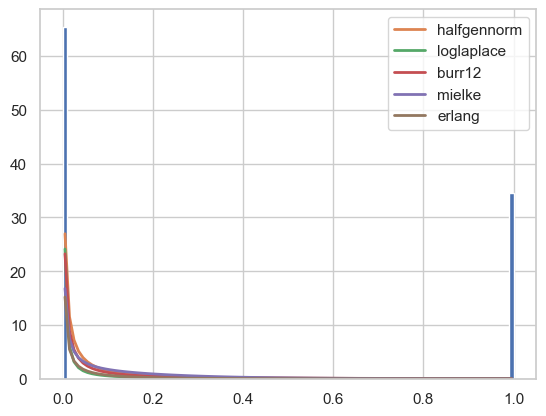

In [96]:
# Fit various distributions:children
expersq = Fitter(nba_salary.children)
expersq.fit()
expersq.summary()

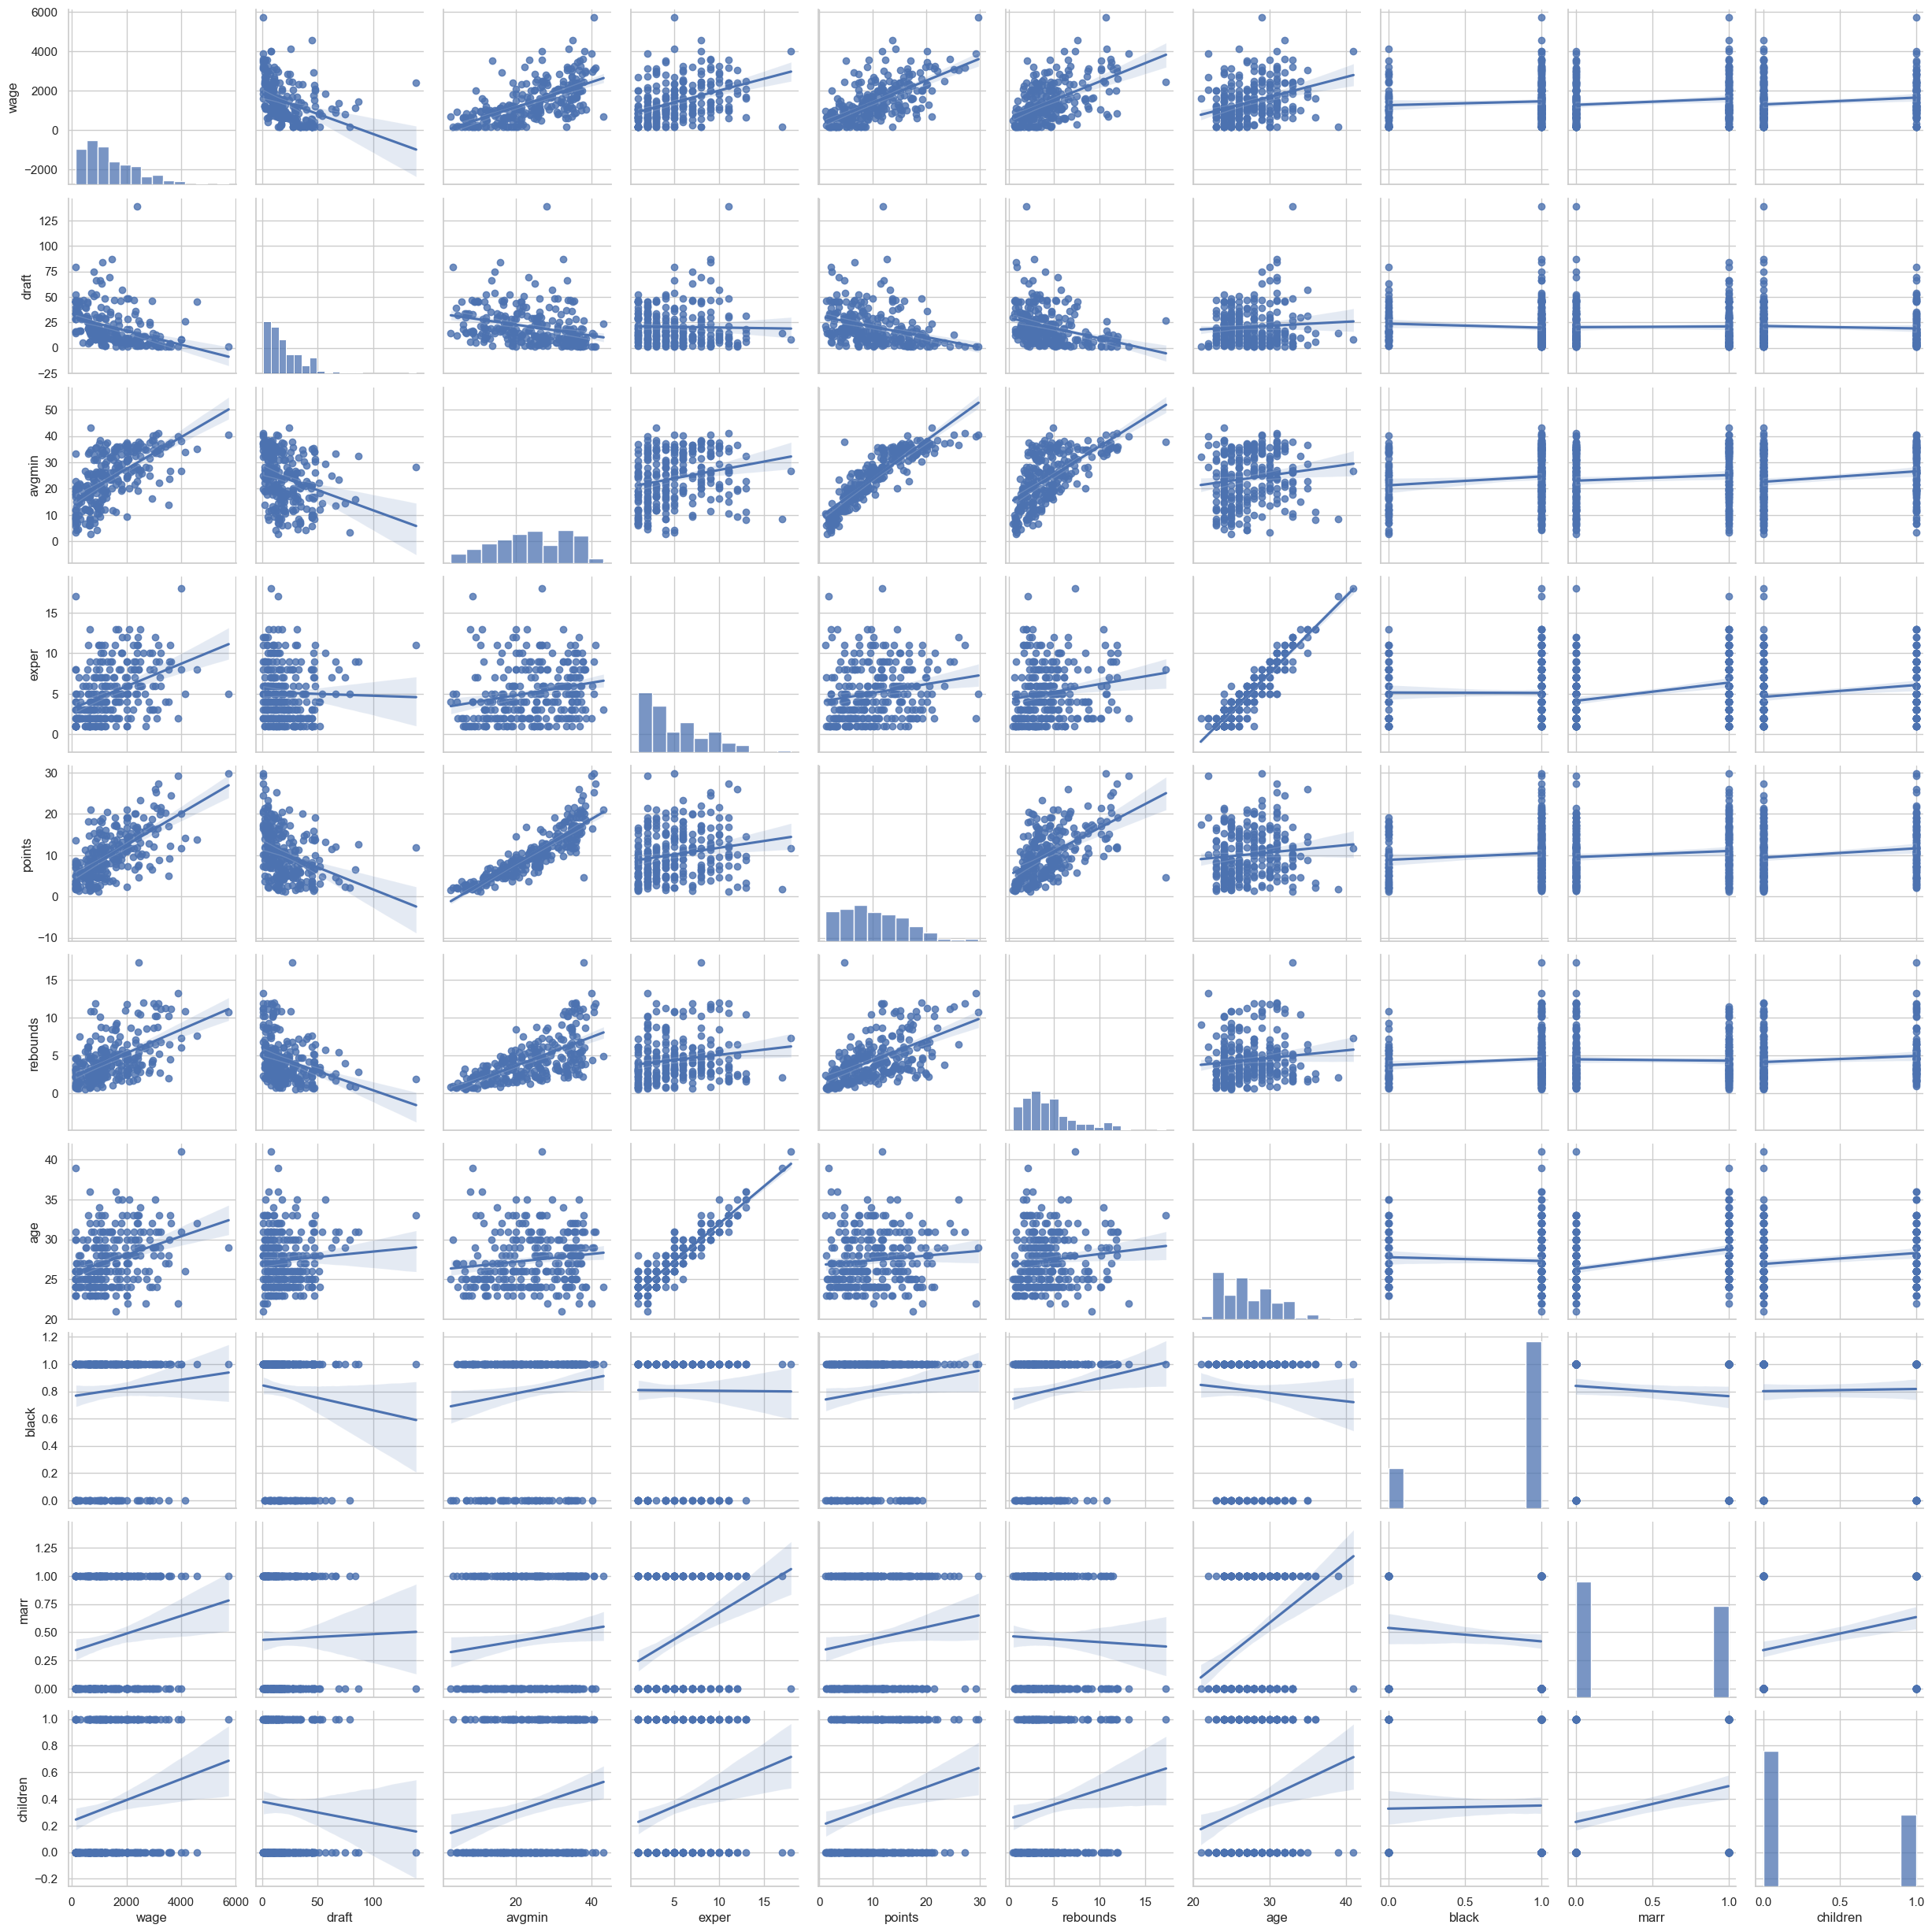

In [120]:
# c) Identify Non-linearities and Transformations (scatterplots)
sns.pairplot(nba_salary, vars=['wage','draft', 'avgmin', 'exper', 'points', 'rebounds', 'age' ,'allstar','marr','children'],kind='reg')
plt.show()

Lambda value: 0.37678529203009037


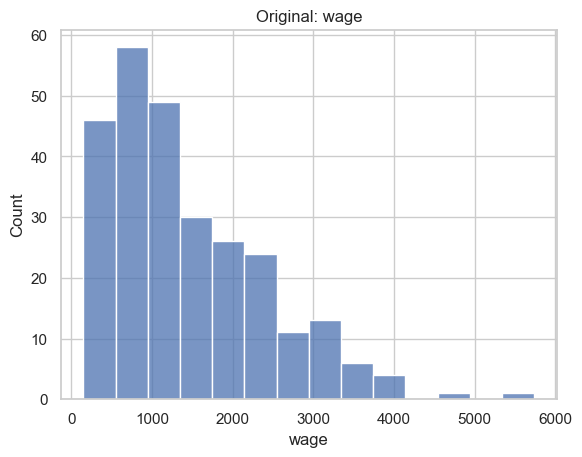

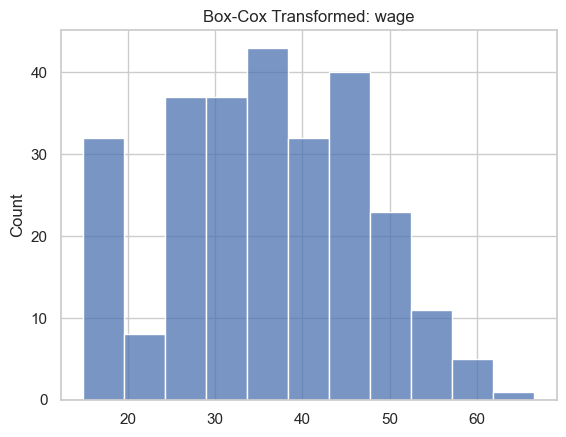

In [90]:
from scipy.stats import boxcox
bc_wage, lambda_wage = boxcox(nba_salary['wage'])
# 'lambda_value' is the calculated power of the transformation
print(f"Lambda value: {lambda_wage}")

sns.histplot(nba_salary.wage)
plt.title("Original: wage")
plt.show()

sns.histplot(bc_wage)
plt.title("Box-Cox Transformed: wage")
plt.show()


Lambda value: 0.273799530119561


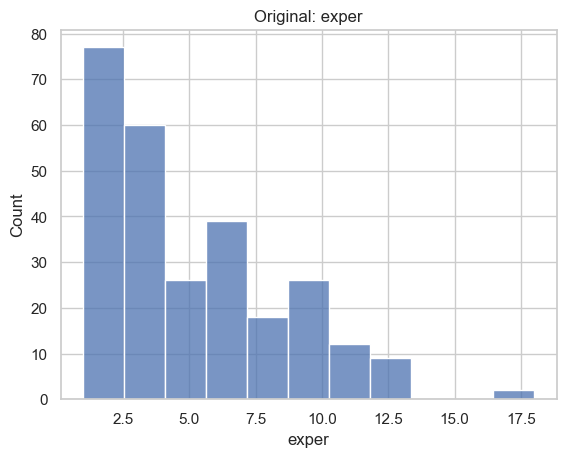

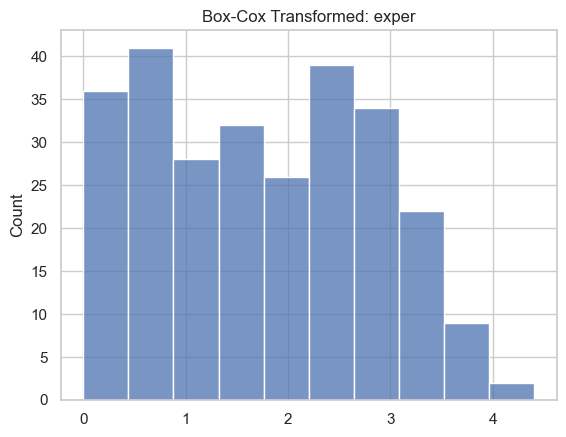

In [88]:
bc_exper, lambda_exper = boxcox(nba_salary['exper'])
# 'lambda_value' is the calculated power of the transformation
print(f"Lambda value: {lambda_exper}")

sns.histplot(nba_salary.exper)
plt.title("Original: exper")
plt.show()

sns.histplot(bc_exper)
plt.title("Box-Cox Transformed: exper")
plt.show()

Lambda value: 0.25213431606373116


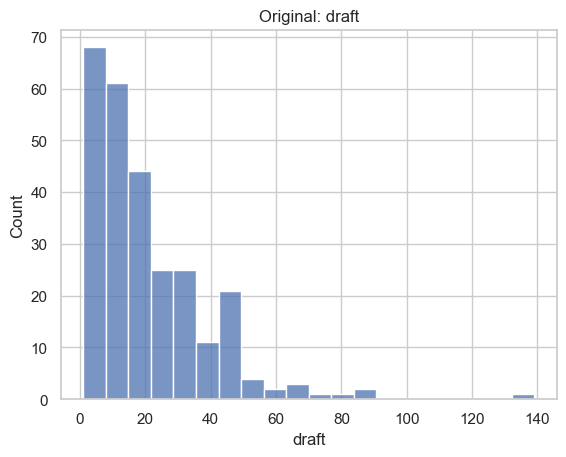

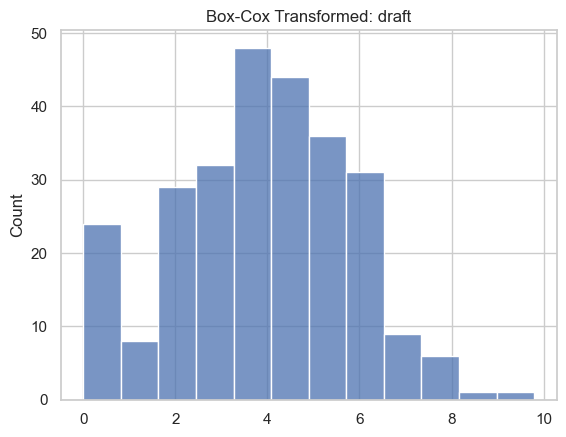

In [117]:
bc_draft, lambda_draft = boxcox(nba_salary['draft'])
# 'lambda_value' is the calculated power of the transformation
print(f"Lambda value: {lambda_draft}")

sns.histplot(nba_salary.draft)
plt.title("Original: draft")
plt.show()

sns.histplot(bc_draft)
plt.title("Box-Cox Transformed: draft")
plt.show()

Lambda value: 0.4212966631607753


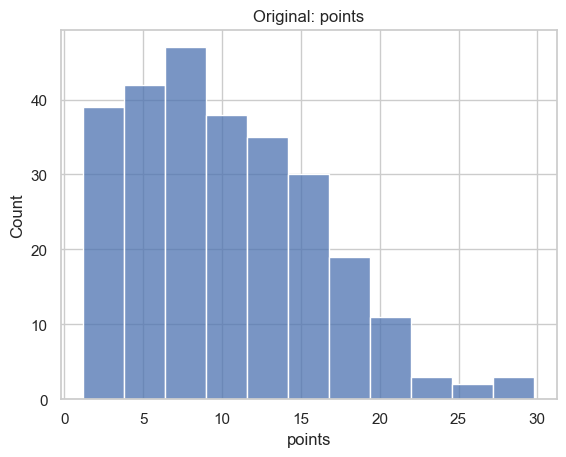

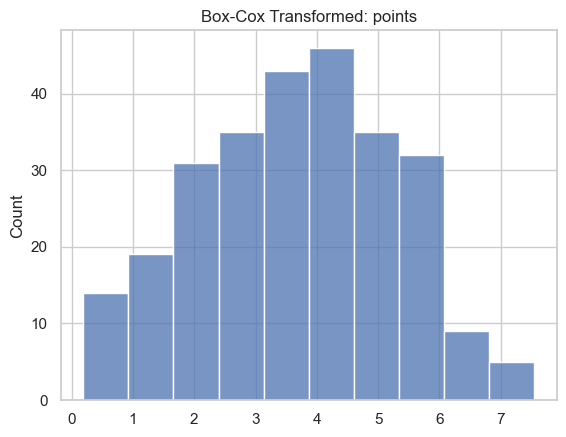

In [97]:
bc_points, lambda_points= boxcox(nba_salary['points'])
# 'lambda_value' is the calculated power of the transformation
print(f"Lambda value: {lambda_points}")

sns.histplot(nba_salary.points)
plt.title("Original: points")
plt.show()

sns.histplot(bc_points)
plt.title("Box-Cox Transformed: points")
plt.show()

Lambda value: 0.2130778779917226


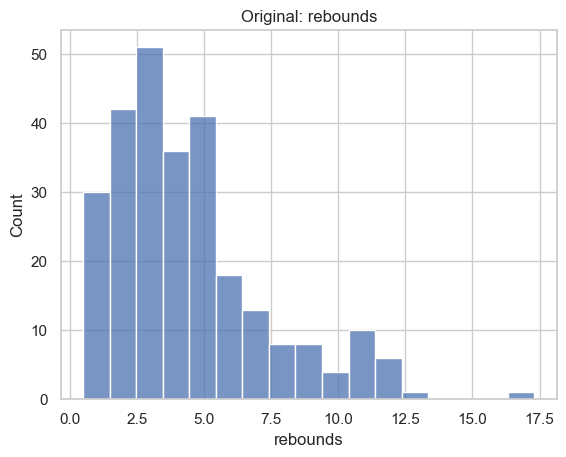

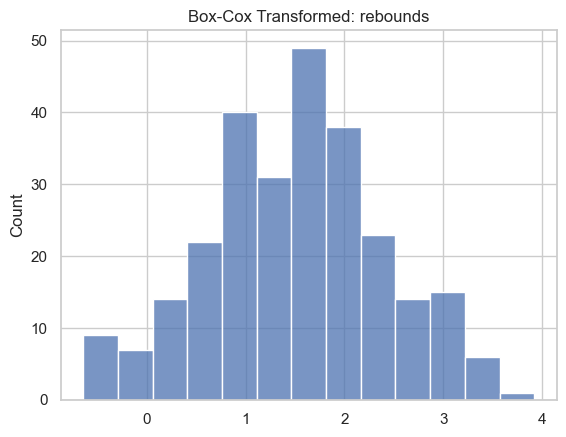

In [98]:
bc_rebounds, lambda_rebounds = boxcox(nba_salary['rebounds'])
# 'lambda_value' is the calculated power of the transformation
print(f"Lambda value: {lambda_rebounds}")

sns.histplot(nba_salary.rebounds)
plt.title("Original: rebounds")
plt.show()

sns.histplot(bc_rebounds)
plt.title("Box-Cox Transformed: rebounds")
plt.show()

Lambda value: -1.7941867316041056


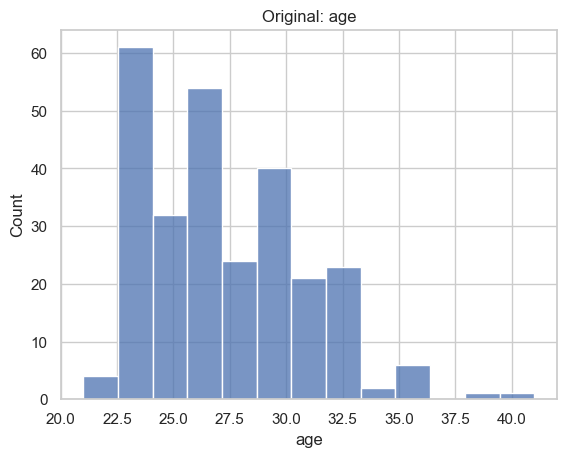

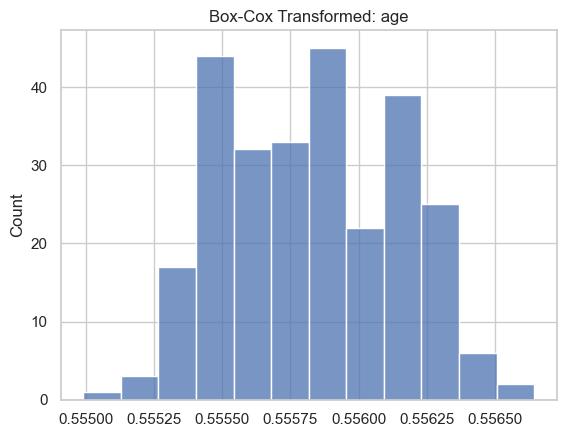

In [99]:
bc_age, lambda_age = boxcox(nba_salary['age'])
# 'lambda_value' is the calculated power of the transformation
print(f"Lambda value: {lambda_age}")

sns.histplot(nba_salary.age)
plt.title("Original: age")
plt.show()

sns.histplot(bc_age)
plt.title("Box-Cox Transformed: age")
plt.show()

Lambda value: 1.0073022193161991


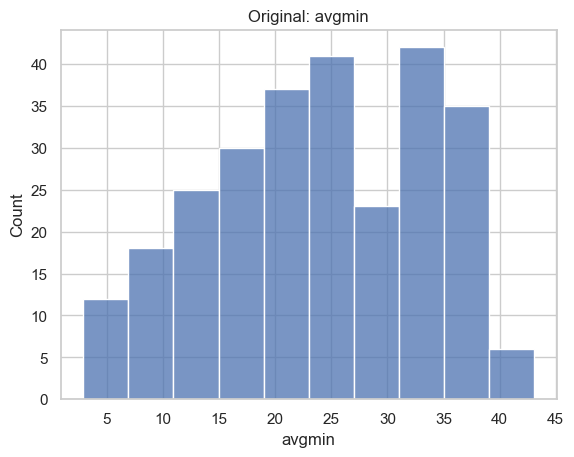

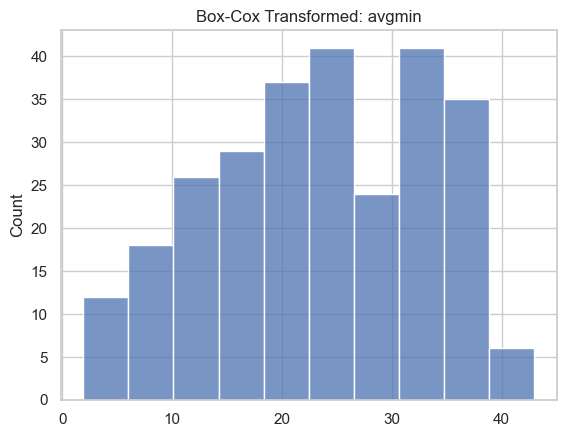

In [121]:
bc_avgmin, lambda_avgmin = boxcox(nba_salary['avgmin'])
# 'lambda_value' is the calculated power of the transformation
print(f"Lambda value: {lambda_avgmin}")

sns.histplot(nba_salary.avgmin)
plt.title("Original: avgmin")
plt.show()

sns.histplot(bc_avgmin)
plt.title("Box-Cox Transformed: avgmin")
plt.show()

c) To scrutinize potential non-linearities and make informed decisions about transformations, a preliminary assessment was conducted using a pair plot. Several observations emerged from this exploratory analysis:

1. The dependent variable, 'wage,' exhibited a subtle curvature concerning certain quantitative variables such as 'draft,' 'points,' 'exper,' 'avgmin,' and 'rebounds.' This suggested a non-linear relationship, emphasizing the need for further investigation.

2. A marginal, yet discernible, non-linear association was identified between NBA salary and 'age,' indicating a potential deviation from linearity.

3. It is crucial to note that assessing linearity with dummy variables is challenging, as their values are binary (1 or 2), limiting the scope of visual inspection.

To delve deeper into the non-linearities and derive more precise insights, a Box-Cox transformation was employed. This technique calculates the optimal transformed lambda, revealing the transformation impact on the data's distribution. The before-and-after transformation graphs provided a visual representation of the transformation's effectiveness. Notably, the data exhibited a more normal distribution post-transformation, suggesting improved linearity.

The optimal lambda values were recorded in the following table:

| Variable   | Optimal Lambda |
|------------|----------------|
| draft      | 0.25           |
| points     | 0.41           |
| exper      | 0.27          |
| avgmin     | 1           |
| rebounds   | 0.21          |
| age        | -1.79           |
|wage        |0.38           |

To enhance the interpretability and economic intuition of the model, a decision was made to round the lambda values. This involved rounding values close to 0 to a logarithmic transformation and those close to 1 to remain unchanged. This nuanced approach aimed to strike a balance between achieving linearity and preserving the economic interpretability of the variables.

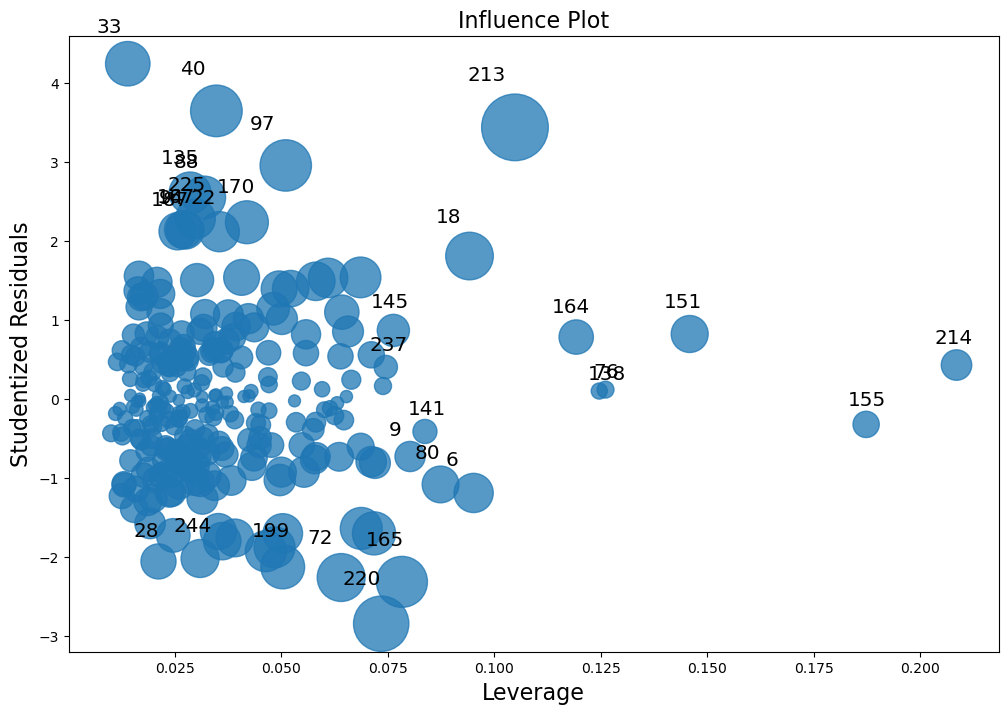

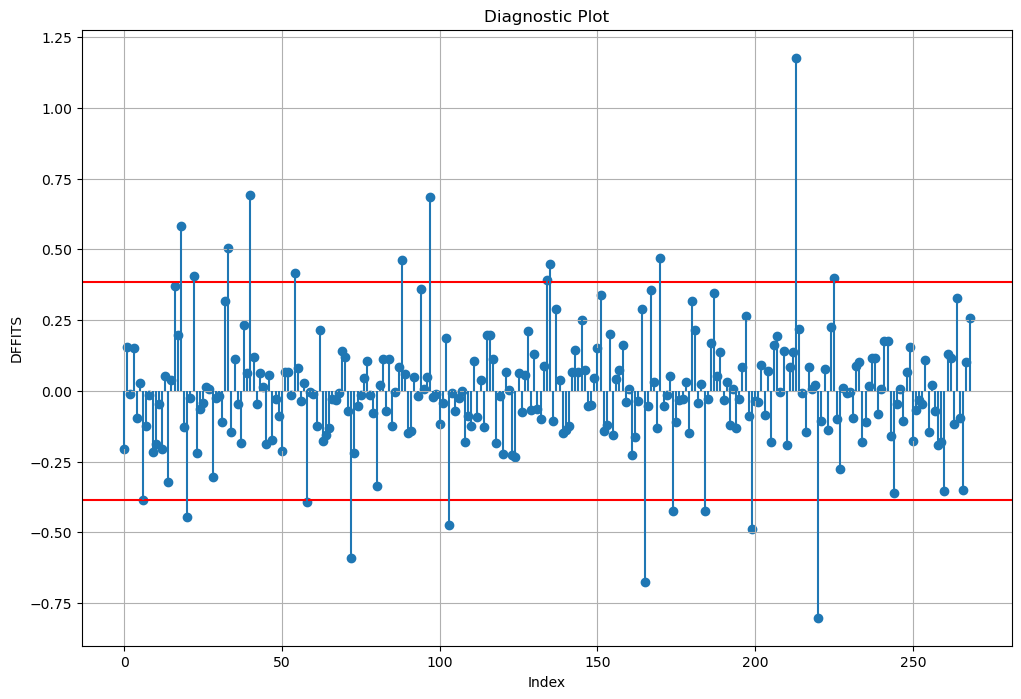

In [16]:
# d) Unusual Observation(DFFITS)
# Fit the linear regression model
salary_fit = smf.ols('wage ~ draft + avgmin + exper + points + rebounds + age + allstar + marr + children', data=nba_salary).fit()

# Create an influence plot
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.influence_plot(salary_fit, ax=ax, criterion="DFFITS")

# Diagnostic plot for DFFITS
dffits, threshold = salary_fit.get_influence().dffits
plt.figure(figsize=(12, 8))
plt.scatter(nba_salary.index, dffits)
plt.axhline(threshold, color='red')
plt.axhline(-threshold, color='red')
plt.vlines(x=nba_salary.index, ymin=0, ymax=dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()

plt.show()

In [17]:
# Remove the unusual observations based on the DFFITS threshold
drop_indices = [i for i, v in enumerate(dffits) if abs(v) > threshold]
nba_salary_drop = nba_salary.drop(drop_indices)
print(drop_indices)
nba_salary_drop.describe()

[6, 18, 20, 22, 33, 40, 54, 58, 72, 88, 97, 103, 134, 135, 165, 170, 174, 184, 199, 213, 220, 225]


,wage,draft,avgmin,exper,points,rebounds,age,allstar,marr,children
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.00000,247.000000
mean,1336.694738,135.189473,23.318040,5.004049,9.831174,4.206883,27.287449,0.097166,0.42915,0.348178
std,877.076883,355.086849,9.584963,3.242876,5.740673,2.776439,3.216188,0.296785,0.49596,0.477360
min,150.000000,1.000000,2.888889,1.000000,1.200000,0.500000,21.000000,0.000000,0.00000,0.000000
25%,650.000000,8.500000,16.369625,2.000000,5.250000,2.300000,25.000000,0.000000,0.00000,0.000000
50%,1120.000000,18.000000,23.789471,4.000000,8.900000,3.600000,27.000000,0.000000,0.00000,0.000000
75%,2000.000000,39.500000,32.185814,7.000000,13.750000,5.250000,30.000000,0.000000,1.00000,1.000000
max,3900.000000,2205.000000,40.962502,13.000000,29.299999,17.299999,36.000000,1.000000,1.00000,1.000000


d) In an effort to discern the presence of anomalous observations in our model, we executed a multiple regression analysis that encompassed all variables: 'exper', 'draft', 'avgmin', 'points', 'rebounds', 'age', 'allstar', 'children', and 'marr'. Subsequently, a DFFITS plot was employed to evaluate the influence of each observation on the regression coefficients. By establishing a predetermined threshold, we aimed to identify observations that exhibited a substantial impact on the fitted values.

Upon inspecting the DFFITS plot, we discerned noteworthy outliers. Specifically, observations at indices 33 and 40 demonstrated conspicuous deviations, signifying their substantial influence on the model. Furthermore, observation at index 214 exhibited characteristics of leverage, indicating a potential influential role in shaping the model's outcome. Additionally, observation at index 213 emerged as a particularly influential data point, exerting a discernible impact on the overall regression.

To address these observations, we made a strategic decision to exclude them from our dataset. The rationale behind this approach lies in the understanding that influential or leveraged observations can disproportionately influence the estimation of regression coefficients, potentially skewing the overall model performance. By iteratively refining our dataset, we aim to enhance the robustness and reliability of our multiple regression analysis.

In [12]:
# e) NA and Replace all missing data
# Look for any missing observations
print(nba_salary.isnull().any())

# Extra sanity check, count the number of many missing obs per variable (if any)
print(nba_salary.isnull().sum())


wage        False
draft        True
avgmin      False
exper       False
points      False
rebounds    False
age         False
allstar     False
marr        False
children    False
dtype: bool
wage         0
draft       29
avgmin       0
exper        0
points       0
rebounds     0
age          0
allstar      0
marr         0
children     0
dtype: int64


In [15]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the data into two sets: one with missing values and one without
data_with_missing = nba_salary[nba_salary['draft'].isnull()]
data_without_missing = nba_salary.dropna(subset=['draft'])

X_train = data_without_missing.drop(['draft', 'wage'], axis=1)
y_train = data_without_missing['wage']
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Use KNN regression for imputation
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_knn, y_train_knn)
missing_values_predictions = knn_regressor.predict(data_with_missing.drop(['draft', 'wage'], axis=1))
# Impute the missing values in the original DataFrame
nba_salary.loc[nba_salary['draft'].isnull(), 'draft'] = missing_values_predictions
# Check for any remaining missing values
print(nba_salary.isnull().sum())


wage        0
draft       0
avgmin      0
exper       0
points      0
rebounds    0
age         0
allstar     0
marr        0
children    0
dtype: int64


e) In our examination of the dataset, a noteworthy observation emerged regarding the variable "draft," which exhibited a notable absence in 29 instances. Recognizing the substantial proportion of missing data and acknowledging the pivotal role of "draft" in wage calculations, conventional solutions such as complete case removal or variable exclusion were deemed unsuitable.

In response to this challenge, we advocate for the adoption of an imputation strategy, specifically leveraging the k-Nearest Neighbors (KNN) algorithm. This approach involves replacing missing values by deriving a weighted average from the closest k neighbors. The nuanced methodology of KNN aligns with our objective to preserve data integrity and fairness. By estimating missing values in "draft" based on the characteristics of neighboring observations, this approach ensures a more equitable representation of the data.

The significance of employing KNN lies in its ability to retain valuable information, contributing to a comprehensive and unbiased depiction of the dataset. This imputation strategy not only addresses the challenge posed by missing values but also enhances the reliability of subsequent analyses. In adopting such a nuanced approach, we aim to mitigate the potential impact of missing values on the overall analytical framework, fostering a more robust and equitable representation of the dataset.lyses.